# Optical Character Recognition from Receipt

#### Libraries importation

In [1]:
import cv2
import pytesseract
import json
from pytesseract import Output
from matplotlib import pyplot as plt

#### Image importation with OpenCV

In [2]:
img = cv2.imread('receipt-1.jpg')

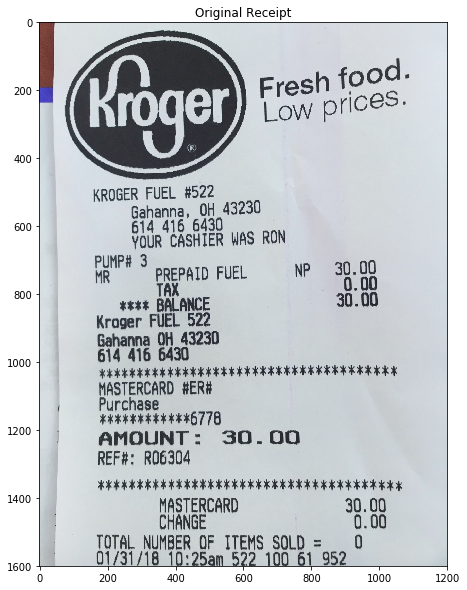

In [3]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.title('Original Receipt')
plt.show()

#### Find bounding box with tesseract library

In [4]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

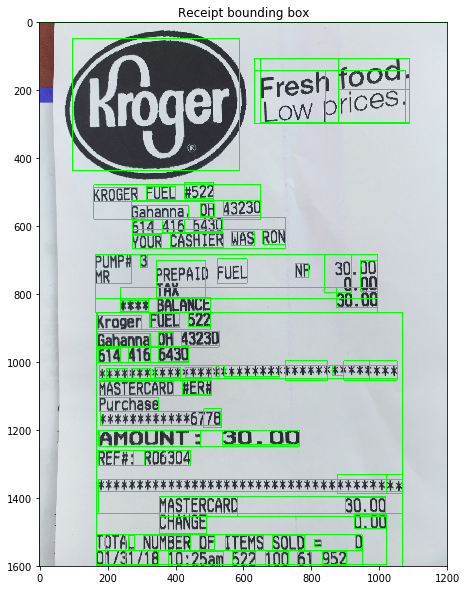

In [5]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.title('Receipt bounding box')
plt.show()

#### Extracted text

In [6]:
print(d['text'])

['', '', '', '', 'food.', '', 'Frost', 'ices.', '', '', '', ' ', '', '', '', 'KROGER', 'FUEL', '#522', '', 'Gahanna,', 'OH', '43230', '', '', '', '614', '416', '6430', '', 'VOUR', 'CASHIER', 'WAS', 'RON', '', '', '', '3', '', 'I', 'PREPAID', 'FUEL', 'NP', '30', '09', '', '#44%', 'BALANCE', '30.00', '', '', '', 'Kroger', 'FUEL', '522', '', '', 'Gahanna', 'OH', '43230', '', '', '614', '416', '6430', '', '', 'TTT', 'TTT', 'TET', 'ECT', 'T', 'TTL', 'ELLE', 'LL', 'LLL', 'Ltt!', '', '', 'MASTERCARD', '#ER#', '', '', 'Purchase', '', '', 'HHHKAAKKKAKAG7', '78', '', '', 'AMOUNT:', '30.00', '', '', 'REF#:', 'RO6304', '', '', 'OOOO', 'ORK', 'Ek', '', 'MASTERCARD', '30.00', '', '', 'rr', 'CHANGE', '0.00', '', '', 'L', 'NUMBER', 'OF', 'ITEMS', 'SOLD', '=', '0', '', '01/31/18', '10:25am', '592', '100', '61', '952']


In [7]:
text = []

In [8]:
for i in d['text']:
    if i != '':
        text.append(i)

In [9]:
print(text)

['food.', 'Frost', 'ices.', ' ', 'KROGER', 'FUEL', '#522', 'Gahanna,', 'OH', '43230', '614', '416', '6430', 'VOUR', 'CASHIER', 'WAS', 'RON', '3', 'I', 'PREPAID', 'FUEL', 'NP', '30', '09', '#44%', 'BALANCE', '30.00', 'Kroger', 'FUEL', '522', 'Gahanna', 'OH', '43230', '614', '416', '6430', 'TTT', 'TTT', 'TET', 'ECT', 'T', 'TTL', 'ELLE', 'LL', 'LLL', 'Ltt!', 'MASTERCARD', '#ER#', 'Purchase', 'HHHKAAKKKAKAG7', '78', 'AMOUNT:', '30.00', 'REF#:', 'RO6304', 'OOOO', 'ORK', 'Ek', 'MASTERCARD', '30.00', 'rr', 'CHANGE', '0.00', 'L', 'NUMBER', 'OF', 'ITEMS', 'SOLD', '=', '0', '01/31/18', '10:25am', '592', '100', '61', '952']


#### Save text as json file

In [10]:
with open('text.json', 'w') as json_file:
    json.dump(text, json_file)